**A project on Machine Learning**

Using Random Forest Classifier Approach, Random Forest Classifier Approach(Using Gaussian Classifier), Logistic Regression Approach and Linear Regression Approach.

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving datasets_dataset.csv to datasets_dataset.csv


In [3]:
#read the csv file using pandas
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [4]:
# Checking the missing values
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

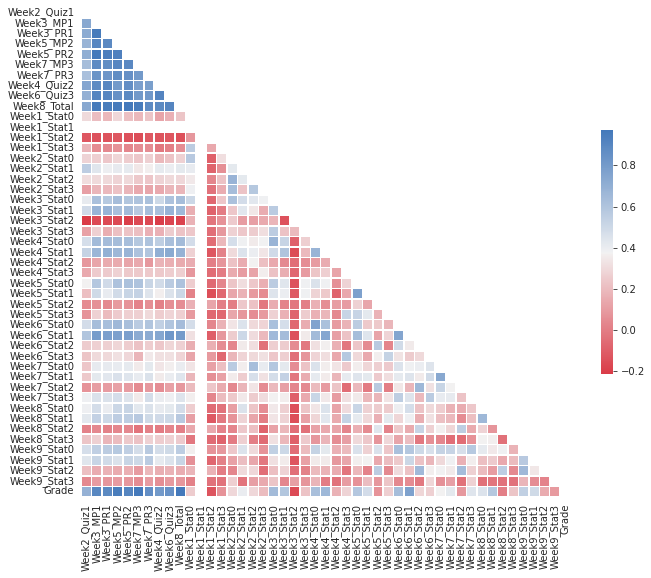

In [5]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [6]:
# data cleaning for accurate result
# drop some irrelevant data 
df.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 
         'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
         'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
         'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
         'Week8_Total', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [7]:
# drop some data that read zero values
df.drop([8, 12, 13, 20, 22,  25, 34, 35, 37, 40, 59, 62, 63, 70, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
         94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], axis = 0, inplace = True)

In [8]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
73,ML-2020-100,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0,4
74,ML-2020-102,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0,5
75,ML-2020-103,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5,4
76,ML-2020-104,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0,4


FOR RANDOM FOREST CLASSIFIER

In [9]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

In [10]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then set the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade,is_train
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,4,True
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,4,True
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,3,True
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,3,True
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,2,True


In [11]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [12]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 50
Number of observations in the test data: 14


In [13]:
# Create a list of the feature column's names
features = df.columns[1:10]

# View features
features

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3'],
      dtype='object')

In [14]:
# train['Grade'] contains the actual grades. Representing each grades 
# by some digit. So, in this case there
# are five grade classifications, and they'd be classified as 0, 1, 2, 3 or 4.
y = pd.factorize(train['Grade'])[0]

# View target
y

array([0, 0, 1, 1, 2, 1, 3, 3, 0, 4, 0, 3, 3, 3, 1, 4, 3, 4, 3, 1, 1, 4,
       0, 0, 1, 0, 4, 0, 1, 4, 0, 2, 4, 2, 3, 3, 3, 3, 1, 0, 1, 3, 1, 4,
       0, 0, 4, 0, 0, 3])

In [15]:
# Create a random forest Classifier.
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the Grade)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [16]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([4, 1, 3, 0, 1, 3, 0, 1, 0, 0, 3, 4, 1, 3])

In [17]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.09, 0.01, 0.  , 0.  , 0.9 ],
       [0.25, 0.4 , 0.28, 0.  , 0.07],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.61, 0.1 , 0.  , 0.  , 0.29],
       [0.19, 0.55, 0.05, 0.04, 0.17],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.48, 0.21, 0.07, 0.  , 0.24],
       [0.18, 0.5 , 0.04, 0.26, 0.02],
       [0.48, 0.36, 0.07, 0.  , 0.09],
       [0.7 , 0.24, 0.04, 0.  , 0.02]])

In [23]:
# Mapping original grades with each predicted grades

preds = y[clf.predict(test[features])]


In [24]:
# View the PREDICTED Grade for the first five observations
preds[0:5]

array([2, 0, 1, 0, 0])

In [25]:
# View the ACTUAL Grades for the first five observations
test['Grade'].head()

7     5
9     3
11    0
16    4
21    3
Name: Grade, dtype: int64

In [26]:
# Create confusion matrix
pd.crosstab(test['Grade'], preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,1,2
Actual Grade,,,
0,0,4,0
2,2,0,0
3,3,0,0
4,3,0,0
5,0,0,2


In [27]:
# View a list of the features and their importance
list(zip(train[features], clf.feature_importances_))


[('Week2_Quiz1', 0.06333409232671046),
 ('Week3_MP1', 0.09985763779060446),
 ('Week3_PR1', 0.016054253241722438),
 ('Week5_MP2', 0.26713316735608605),
 ('Week5_PR2', 0.08976915674487904),
 ('Week7_MP3', 0.2849232030825737),
 ('Week7_PR3', 0.04293548786847145),
 ('Week4_Quiz2', 0.09797830038176895),
 ('Week6_Quiz3', 0.03801470120718346)]

RANDOM FOREST CLASSIFIER 2 (USING GAUSSIAN CLASSIFIER)

In [28]:
#read the csv file using pandas
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [29]:
# data cleaning for accurate result
# drop some irrelevant data 
df.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 
         'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
         'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
         'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
         'Week8_Total', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [30]:
# drop some data that read zero values
df.drop([8, 12, 13, 20, 22,  25, 34, 35, 37, 40, 59, 62, 63, 70, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
         94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], axis = 0, inplace = True)

In [31]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
73,ML-2020-100,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0,4
74,ML-2020-102,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0,5
75,ML-2020-103,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5,4
76,ML-2020-104,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0,4


In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3']
label = ['Grade']
X = df[features]  # Features
y = df[label]  # Label

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6923076923076923


In [35]:
feature_imp = pd.Series(clf.feature_importances_, index = features).sort_values(ascending=False)
feature_imp

Week7_MP3      0.285041
Week5_MP2      0.259594
Week3_MP1      0.142825
Week4_Quiz2    0.078794
Week5_PR2      0.063371
Week2_Quiz1    0.051178
Week3_PR1      0.047455
Week6_Quiz3    0.043308
Week7_PR3      0.028434
dtype: float64

No handles with labels found to put in legend.


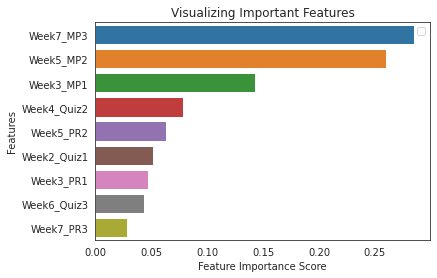

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

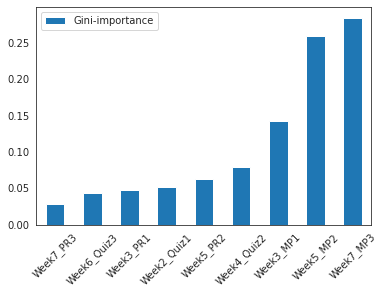

In [37]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [70]:
# install and import wandb package for visualization
!pip install wandb -qq
import wandb
# initializing wandb(weight and base biase)
wandb.init(project = 'Visualize-sklearn')

     |████████████████████████████████| 1.7 MB 7.2 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 140 kB 57.1 MB/s 
     |████████████████████████████████| 180 kB 48.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [73]:
# Plot confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, y_train)

ValueError: ignored

FOR LOGISTIC REGRESSION

In [38]:
# import sklearn modules for model-selection, calculating the 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
#read the csv file using pandas
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [40]:
# data cleaning for accurate result
# drop some irrelevant data 
df.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 
         'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
         'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
         'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
         'Week8_Total', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [41]:
# drop some data that read zero values
df.drop([8, 12, 13, 20, 22,  25, 34, 35, 37, 40, 59, 62, 63, 70, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
         94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], axis = 0, inplace = True)

In [42]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
73,ML-2020-100,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0,4
74,ML-2020-102,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0,5
75,ML-2020-103,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5,4
76,ML-2020-104,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0,4


In [60]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = df.iloc[:, 1:-1]

# y = target values, last column of the data frame
y = df.iloc[:, -1:]

In [61]:
X

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3
0,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0
1,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0
2,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0
3,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0
4,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0
...,...,...,...,...,...,...,...,...,...
73,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0
74,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0
75,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5
76,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0


In [62]:
y

,Grade
0,4
1,4
2,3
3,3
4,2
...,...
73,4
74,5
75,4
76,4


In [46]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Scaling and training the model at the same time
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [48]:
pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.

0.7692307692307693

In [49]:
#Test the model
predictions = pipe.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

[0 4 3 3 3 3 0 5 5 5 3 0 4]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       1.00      0.50      0.67         4
           5       0.67      1.00      0.80         2

    accuracy                           0.77        13
   macro avg       0.65      0.70      0.64        13
weighted avg       0.78      0.77      0.73        13

0.7692307692307693


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Computing F1_score for micro average
from sklearn.metrics import f1_score
metrics.f1_score(y_test, predictions, labels=np.unique(predictions), average = 'micro')

0.8

ValueError: ignored

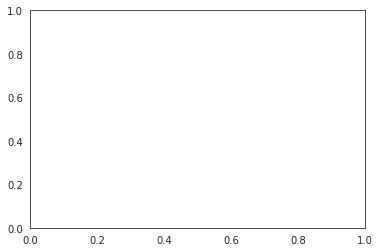

In [63]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

FOR LINEAR REGRESSION

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
#read the csv file using pandas
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [54]:
# data cleaning for accurate result
# drop some irrelevant data 
df.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 
         'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
         'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
         'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
         'Week8_Total', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [55]:
# drop some data that read zero values
df.drop([8, 12, 13, 20, 22,  25, 34, 35, 37, 40, 59, 62, 63, 70, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
         94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], axis = 0, inplace = True)

In [56]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
73,ML-2020-100,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0,4
74,ML-2020-102,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0,5
75,ML-2020-103,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5,4
76,ML-2020-104,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0,4


In [57]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = df.iloc[:, 1:-1]

# y = target values, last column of the data frame
y = df.iloc[:, -1:]

In [58]:
X

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3
0,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0
1,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0
2,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0
3,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0
4,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0
...,...,...,...,...,...,...,...,...,...
73,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0
74,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0
75,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5
76,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0


In [59]:
y

,Grade
0,4
1,4
2,3
3,3
4,2
...,...
73,4
74,5
75,4
76,4


In [64]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

In [65]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [66]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [[ 0.08460737  0.03432622 -0.05457394  0.10366817 -0.14977622  0.07725613
   0.12429564  0.10277638 -0.10145608]]
Mean squared error: 0.19
Coefficient of determination: 0.95


ValueError: ignored

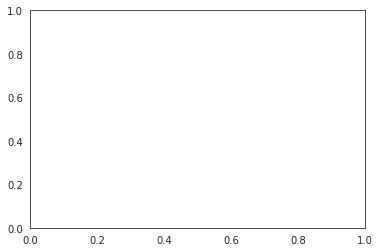

In [68]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()